In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
i = 0
for dirname, _, filenames in os.walk('data/train'):
    for filename in filenames:
        if '.png' in filename:
            #print(os.path.join(dirname, filename))
            i += 1
print(i)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1520


In [2]:
df_train =  pd.read_csv('data/train_labels.csv')
df_train

filename  width  height  \
0      00000000a9764df2_20191005_085747_4.png    524     750   
1      00000000a9764df2_20191005_085747_4.png    524     750   
2      00000000a9764df2_20191005_085747_4.png    524     750   
3      00000000a9764df2_20191005_085747_4.png    524     750   
4      00000000a9764df2_20191005_085747_4.png    524     750   
...                                       ...    ...     ...   
11075  00000000a9764df2_20191003_163704_4.png    524     750   
11076  00000000a9764df2_20191003_163704_4.png    524     750   
11077  00000000a9764df2_20191003_163704_4.png    524     750   
11078  00000000a9764df2_20191003_163704_4.png    524     750   
11079  00000000a9764df2_20191003_163704_4.png    524     750   

                  class  xmin  ymin  xmax  ymax  
0        cappy_portakal    60     7   210    90  
1      fuse_tea_seftali   217     1   396    78  
2        johnnie_walker   390     1   439   155  
3                miller    65    86   387   199  
4            kinder_joy   438    83   503   193  
...                 ...   ...   ...   ...   ...  
11075           campari   383    26   452   176  
11076           baileys    68   189   215   251  
11077            kahlua    97   519   223   567  
11078         beefeater   409   534   471   664  
11079    johnnie_walker    65   667   219   747  

[11080 rows x 8 columns]

In [3]:
df_test =  pd.read_csv('data/test_labels.csv')
df_test

filename  width  height  \
0     00000000a9764df2_20191005_030806_4.png    524     750   
1     00000000a9764df2_20191005_030806_4.png    524     750   
2     00000000a9764df2_20191005_030806_4.png    524     750   
3     00000000a9764df2_20191005_030806_4.png    524     750   
4     00000000a9764df2_20191005_030806_4.png    524     750   
...                                      ...    ...     ...   
3995  00000000a9764df2_20191003_190301_4.png    524     750   
3996  00000000a9764df2_20191003_190301_4.png    524     750   
3997  00000000a9764df2_20191003_190301_4.png    524     750   
3998  00000000a9764df2_20191003_190301_4.png    524     750   
3999  00000000a9764df2_20191003_190301_4.png    524     750   

                      class  xmin  ymin  xmax  ymax  
0            nescafe_xpress    57     7   225    88  
1                      burn   231     1   424    74  
2                    sprite    65   116   250   196  
3                     fanta   280    75   463   188  
4     tadim_kavrulmus_badem    65   501   206   686  
...                     ...   ...   ...   ...   ...  
3995              efes_malt    60   320   452   441  
3996     redbull_sugar_free    81   501   260   565  
3997        efes_extra_shot   344   500   468   552  
3998                  pepsi    64   590   249   683  
3999         lipton_ice_tea   292   559   468   678  

[4000 rows x 8 columns]

In [4]:
def decouple(df):
    matrix = {}
    classes = {}
    for index, row in df.iterrows():
        if row['filename'] not in matrix:
            matrix[row['filename']] = {'count':0}
        if row['class'] not in matrix[row['filename']]:
            matrix[row['filename']][row['class']] = 1
        else:
            matrix[row['filename']][row['class']] += 1
        matrix[row['filename']]['count'] += 1

        if row['class'] not in classes:
            classes[row['class']] = 1
        else:
            classes[row['class']] += 1
    #classes = {k: v for k, v in sorted(classes.items(), key=lambda item: item[1])}            
    return matrix,classes

In [5]:
matrix_train,classes_train = decouple(df_train)
matrix_test,classes_test = decouple(df_test)

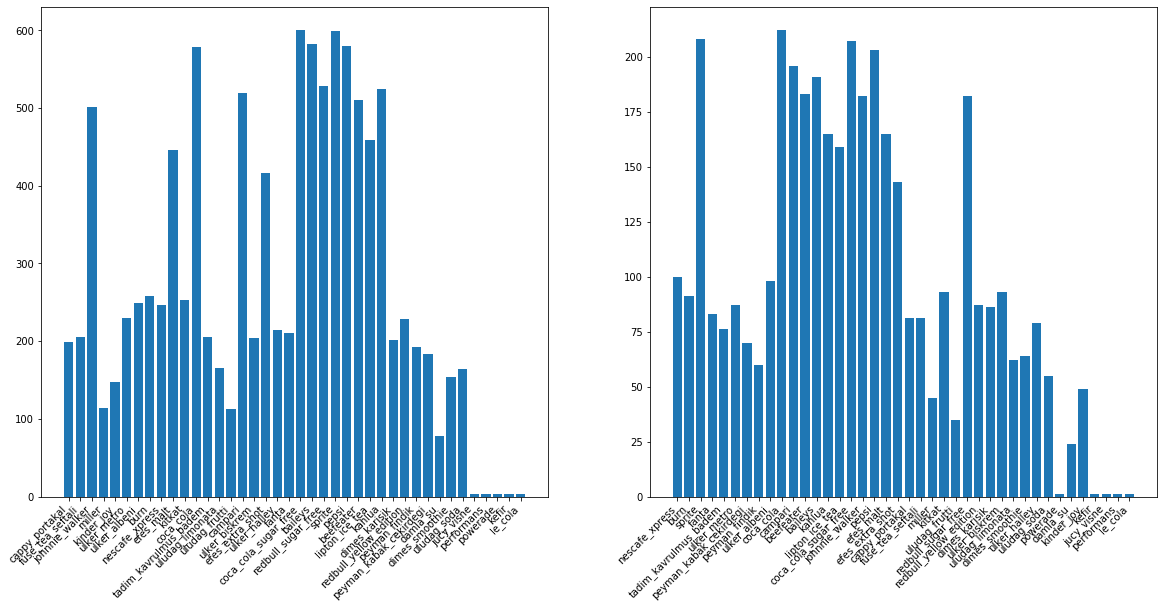

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].bar(list(classes_train.keys()), list(classes_train.values()))
ax[1].bar(list(classes_test.keys()), list(classes_test.values()))
fig.autofmt_xdate(rotation=45)
plt.show()

Every picture has multiple objects in them. Following section shows histogram of the count of objects that contains in each picture. For example first graph shows train list and most of the images has 1 objects in them. 

Notice that there is there is also considrable amount of images that has 13 objects marked in them.

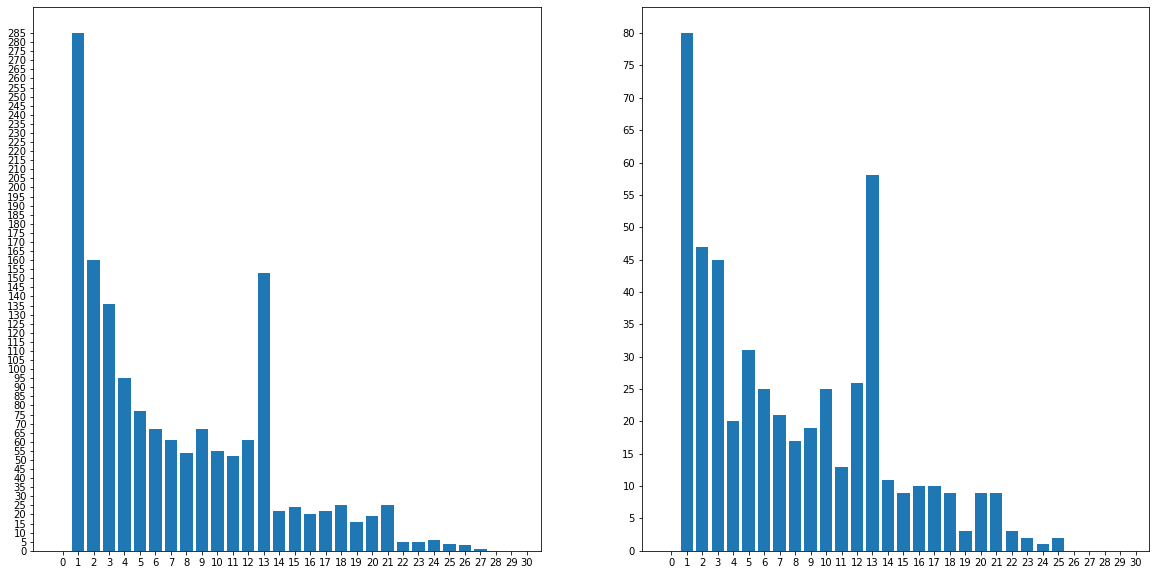

In [7]:
def count_histogram(matrix):
    count = np.zeros(30)
    for v in matrix.values():
        count[v['count']] += 1
    return count.tolist()

fig, ax = plt.subplots(1,2,figsize=(20,10))

c_train = count_histogram(matrix_train)
ax[0].bar(range(len(c_train)),c_train)
ax[0].xaxis.set_ticks(np.arange(0, len(c_train)+1, 1.0))
ax[0].yaxis.set_ticks(np.arange(0, max(c_train)+1, 5.0))

c_test = count_histogram(matrix_test)
ax[1].bar(range(len(c_test)),c_test)
ax[1].xaxis.set_ticks(np.arange(0, len(c_test)+1, 1.0))
ax[1].yaxis.set_ticks(np.arange(0, max(c_test)+1, 5.0))

plt.show()

some example images that contains 13 objects.

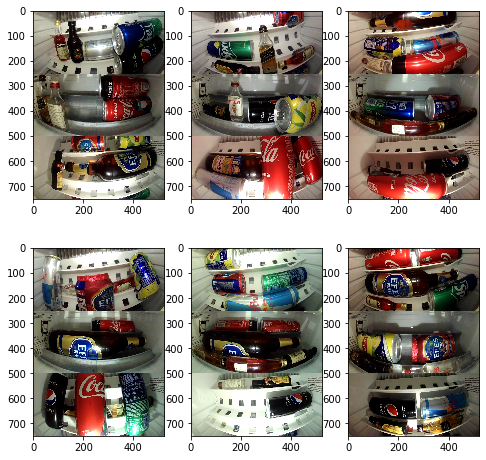

In [8]:
smaple_images = []
for fname,v in matrix_train.items():
    if v['count'] == 13:
        smaple_images.append(fname)
    if(len(smaple_images) >= 6):
        break
   
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = image.imread('data/train/'+smaple_images[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()    

---
Under this section I am trying to discover how keras Image generator augmentation works.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        validation_split=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory='data/train',
        x_col='filename',
        y_col='class',
        target_size=(750, 524),
        batch_size=1,
        class_mode='categorical',
        subset="training",)


Using TensorFlow backend.
Found 8864 validated image filenames belonging to 40 classes.


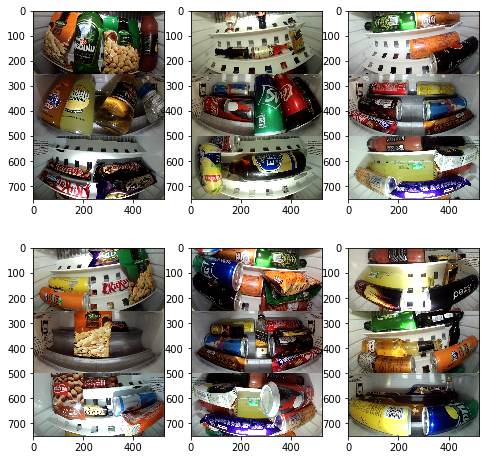

In [10]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    batch = train_generator.next()
    image = batch[0].astype('uint8')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[0])
plt.show() 

---
In this section I will try to understand how pre-trained VGG16 sees the images.



In [11]:
from keras import backend as K
def get_3rd_layer_output(layer_index=-1):
    if layer_index==-1:
        layer_index = len(model.layers)-1
    return K.function([model.layers[0].input], [model.layers[layer_index].output])              

In [12]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential

model = VGG16(include_top=False,input_shape=(750,524,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 750, 524, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 750, 524, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 750, 524, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 375, 262, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 375, 262, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 375, 262, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 187, 131, 128)     0     

In [13]:
for i in range(1):
    batch = train_generator.next()
    feature = model.predict(batch[0])
    print(feature.shape)
    print(batch[0].shape)

(1, 23, 16, 512)
(1, 750, 524, 3)


(1, 187, 131, 128)


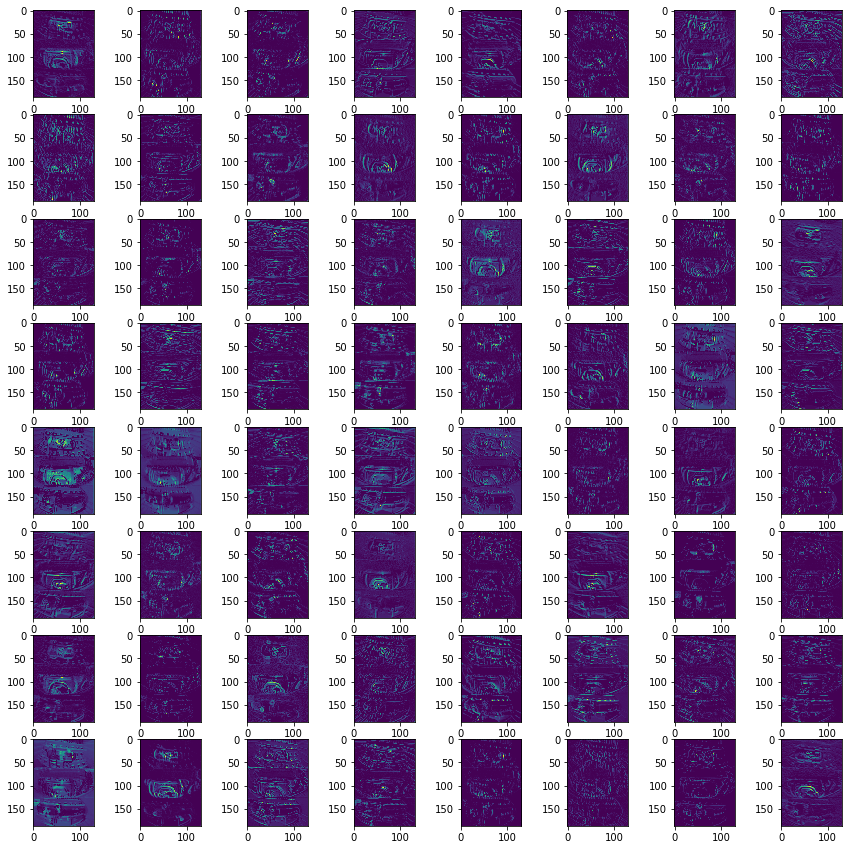

In [14]:
features = get_3rd_layer_output(6)(batch[0])
print(features[0].shape)

fig=plt.figure(figsize=(15, 15))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(features[0][0,:,:,i])
plt.show() 

---
So below this section I will try to discover to see some sample input and sample output. Our images has multiple objects in them so the dataset should have one imagee and more then one objects in them. Let's check

Found 8864 validated image filenames belonging to 40 classes.
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

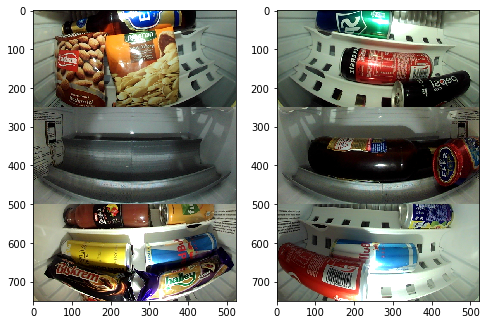

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        validation_split=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory='data/train',
        x_col='filename',
        y_col='class',
        target_size=(750, 524),
        batch_size=4,
        class_mode='categorical',
        subset="training",)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    batch = train_generator.next()
    image = batch[0].astype('uint8')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[0])
    print(batch[1])
plt.show() 

So the above example is wrong. I need to see multiple 1s in the output y when there is multiple objects in the image.

In [16]:
def to_df(matrix):
    filenames = []
    labels = []
    for filename in matrix:
        filenames.append(filename)
        label = list(matrix[filename].keys())
        label.pop(0)
        labels.append(label)
    return pd.DataFrame(list(zip(filenames,labels)),columns=['filename','class'])

In [17]:
df_train_agg = to_df(matrix_train)
df_train_agg

filename  \
0     00000000a9764df2_20191005_085747_4.png   
1     00000000a9764df2_20191005_062049_4.png   
2     00000000a9764df2_20191005_005103_4.png   
3     00000000a9764df2_20191005_004157_4.png   
4     00000000a9764df2_20191005_091729_4.png   
...                                      ...   
1515  00000000a9764df2_20191005_040205_4.png   
1516  00000000a9764df2_20191003_170516_4.png   
1517  00000000a9764df2_20191003_164940_4.png   
1518  00000000a9764df2_20191003_232832_4.png   
1519  00000000a9764df2_20191003_163704_4.png   

                                                  class  
0     [cappy_portakal, fuse_tea_seftali, johnnie_wal...  
1                  [ulker_halley, ulker_biskrem, fanta]  
2                                         [ulker_metro]  
3                                        [ulker_halley]  
4                                        [ulker_albeni]  
...                                                 ...  
1515  [dimes_smoothie, peyman_findik, uludag_soda, p...  
1516  [pepsi, lipton_ice_tea, johnnie_walker, beefea...  
1517  [pepsi, coca_cola_sugar_free, efes_malt, sprit...  
1518  [efes_malt, coca_cola, coca_cola_sugar_free, l...  
1519  [campari, baileys, kahlua, beefeater, johnnie_...  

[1520 rows x 2 columns]

and let's ttry to give this dataframe and see what will be the outcome.

Found 1216 validated image filenames belonging to 40 classes.
[[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]]


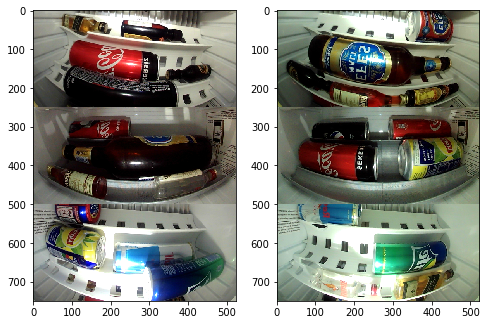

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        validation_split=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=df_train_agg,
        directory='data/train',
        x_col='filename',
        y_col='class',
        target_size=(750, 524),
        batch_size=2,
        class_mode='categorical',
        subset="training",)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    batch = train_generator.next()
    image = batch[0].astype('uint8')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[0])
    print(batch[1])
plt.show() 

Yeah! it is working I see multiple 1s in output on each batch item. and also multiple objects in the image. All we need to scriptize the to_df and decouple functions